In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Fixed Parameters
r = 0.05
q = 0.01
sig = 0.5
T = 1.0

In [102]:
# Plotting lognormal density f(S|S0) for various s0
m = 1500
S = np.zeros((m, 1))
for i in range(m):
    S[i] = 0.25 + i + 0.25
    
f_50 = black_scholes(S, r, q, sig, 50, T)
f_100 = black_scholes(S, r, q, sig, 100, T)
f_150 = black_scholes(S, r, q, sig, 150, T)
f_200 = black_scholes(S, r, q, sig, 200, T)

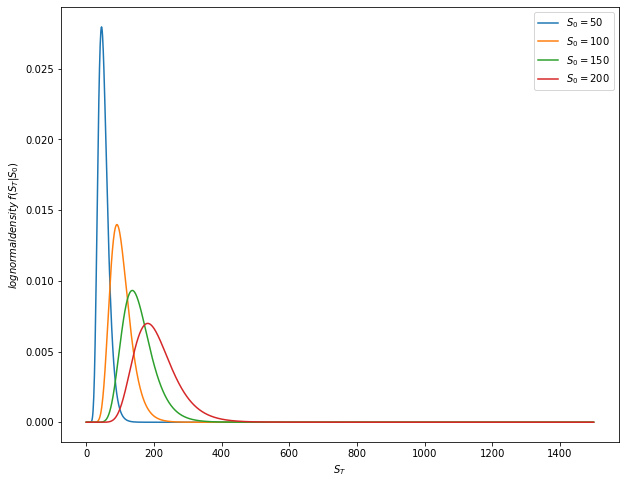

In [103]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(S, f_50)
plt.plot(S, f_100)
plt.plot(S, f_150)
plt.plot(S, f_200)
plt.xlabel('$S_T$')
plt.ylabel('$lognormal density \; f(S_T|S_0)$')
plt.legend(['$S_0 = 50$', '$S_0 = 100$', '$S_0 = 150$', '$S_0 = 200$'])
plt.show()

In [118]:
# Fixed Parameters
S0 = 100
K = 80
r = 0.05
q = 0.01
sig = 0.3
T = 1.0

# step-size
eta = 0.20

# number of grid points
n = 12
N = 2 ** n
B = K + N * dS

In [178]:
class BlackMertonScholes:
    def __init__(self):
        pass

    def black_scholes(S, r, q, sig, S0, T):
        numerator =  np.exp(-0.5 * ((np.log(S / S0) - (r - q - sig ** 2 / 2) * T) / (sig * np.sqrt(T))) ** 2)
        denominator = sig * S * np.sqrt(2 * np.pi * T)
        return numerator / denominator

    def evaluate_integral_call(self, r, q, S0, K, sig, T, N, eta):
        sum_call = 0
        for j in range(N):
            Sj = K + j * eta
            proba_dis = self.black_scholes(Sj, r, q, sig, S0, T)

            if j == 0: # 0 means 1 since python starts at 0
                wj = eta / 2
            else:
                wj = eta


            if K < Sj:
                C = (Sj - K) * proba_dis * wj
                sum_call += C

        sum_call *= np.exp(-r * T)

        return sum_call

    def evaluate_integral_put(self, r, q, S0, K, sig, T, N, dS):
        sum_put = 0
        for j in range(1, N):
            Sj = j * eta
            proba_dis = self.black_scholes(Sj, r, q, sig, S0, T)


            if j == 0: # 0 means 1 since python starts at 0
                wj = eta / 2
            else:
                wj = eta

            if K > Sj:
                P = (K - Sj) * proba_dis * wj
                sum_put += P

        sum_put *= np.exp(-r * T)

        return sum_put

In [179]:
evaluate_integral_call(r, q, S0, K, sig, T, N, eta)

25.614580613328123

In [177]:
evaluate_integral_put(r, q, S0, K, sig, T, N, dS)

2.7079511985570868